In [162]:
import pandas as pd
import numpy as np

In [163]:
path = '../data/raw_data/women_boards_europe.xlsx'
files = ['total', 'detail']
sheets = ['women_boards_total', 'women_boards_detail']

In [6]:
labeledData = {k:pd.read_excel(path, v, dtype=str) for (k,v) in zip(files, sheets)} 

In [185]:
totalData = labeledData['total']
totalData.head()

,Largest listed companies,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Important information:,"Data on Presidents, members, and employee repr...",NaN,NaN,NaN,NaN,NaN
2,NaN,"Data on CEOs, executives and non-executives (i...",NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,For further information:,For methodological specifications refer to:,NaN,NaN,NaN,NaN,NaN


In [186]:
totalData = totalData[totalData.isnull().sum(axis=1) < 5]
totalData = totalData.iloc[1: , :]
totalData.reset_index(inplace=True)

In [187]:
columnNames = {'Largest listed companies': 'Country', 'Unnamed: 1' : 'Number_total', 
               'Unnamed: 2' : 'Number_women', 'Unnamed: 3' : 'Number_men', 
               'Unnamed: 4' : 'Percent_total', 'Unnamed: 5' : 'Percent_women',
               'Unnamed: 6' : 'Percent_men'} 

totalData.rename(columns = columnNames, inplace=True);

In [188]:
# This will convert all the columns to numeric except 'Country'
cols = totalData.columns.drop(['Country'])
totalData[cols] = totalData[cols].apply(pd.to_numeric, errors='coerce')

In [189]:
totalData.head()

,index,Country,Number_total,Number_women,Number_men,Percent_total,Percent_women,Percent_men
0,18,European Union - 27 countries (from 2020),5345,1690,3655,100,31.6,68.4
1,19,European Union - 28 countries (1993-2020),5896,1905,3991,100,32.3,67.7
2,20,Belgium,205,76,129,100,37.1,62.9
3,21,Bulgaria,59,10,49,100,16.9,83.1
4,22,Czechia,61,13,48,100,21.3,78.7


In [190]:
import geopandas as gpd
import folium

In [191]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [192]:
totalDataMap = world.merge(totalData[['Country','Percent_women']], how="left", left_on=['name'], right_on=['Country'])
print(totalDataMap.head())

     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry Country  Percent_women  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...     NaN            NaN  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...     NaN            NaN  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...     NaN            NaN  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...     NaN            NaN  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...     NaN            NaN  


In [193]:
europeMap = folium.Map()

In [194]:
mapData = totalDataMap.dropna(subset=['Percent_women'])

In [200]:
folium.Choropleth(
    geo_data=mapData,
    name='choropleth',
    data=mapData,
    columns=['Country', 'Percent_women'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Percentage of women in decision making'
).add_to(europeMap)
europeMap.save('../graphics/europeMap.html')

In [201]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}

highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

In [203]:
NIL = folium.features.GeoJson(
    mapData,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['Country', 'Percent_women'],
        aliases=['Pais: ','Women percentage: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)

In [204]:
europeMap.add_child(NIL)

In [205]:
europeMap.keep_in_front(NIL)
folium.LayerControl().add_to(europeMap)
europeMap.save('../graphics/europeMap.html')

In [72]:
detailData = labeledData['detail']
detailData.head()

,Year,_geo,Country,Value,UNIT,Unit,EGROUP,_EGROUP,Position,Position_init,sex,Gender,NACE,NACE_init
0,2012-B2,AT,Austria,0,Number of persons (headcount),NR,Largest listed companies,COMP,CEO (Chief Executive Officer),CEO,Women,W,"C, E & F (Mining & quarrying; electricity, gas...",CEF
1,2013-B1,AT,Austria,0,Number of persons (headcount),NR,Largest listed companies,COMP,CEO (Chief Executive Officer),CEO,Women,W,"C, E & F (Mining & quarrying; electricity, gas...",CEF
2,2013-B2,AT,Austria,0,Number of persons (headcount),NR,Largest listed companies,COMP,CEO (Chief Executive Officer),CEO,Women,W,"C, E & F (Mining & quarrying; electricity, gas...",CEF
3,2014-B1,AT,Austria,0,Number of persons (headcount),NR,Largest listed companies,COMP,CEO (Chief Executive Officer),CEO,Women,W,"C, E & F (Mining & quarrying; electricity, gas...",CEF
4,2014-B2,AT,Austria,0,Number of persons (headcount),NR,Largest listed companies,COMP,CEO (Chief Executive Officer),CEO,Women,W,"C, E & F (Mining & quarrying; electricity, gas...",CEF


In [73]:
detailData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402180 entries, 0 to 402179
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Year           402180 non-null  object
 1   _geo           402180 non-null  object
 2   Country        402180 non-null  object
 3   Value          402180 non-null  object
 4   UNIT           402180 non-null  object
 5   Unit           402180 non-null  object
 6   EGROUP         402180 non-null  object
 7   _EGROUP        402180 non-null  object
 8   Position       402180 non-null  object
 9   Position_init  402180 non-null  object
 10  sex            402180 non-null  object
 11  Gender         402180 non-null  object
 12  NACE           402180 non-null  object
 13  NACE_init      402180 non-null  object
dtypes: object(14)
memory usage: 43.0+ MB


In [74]:
columnNames = {'time': 'Year', 'geo' : 'Country', '_UNIT' : 'Unit', 'value' : 'Value', 'POSITION' : 'Position',
               '_POSITION' : 'Position_init', '_sex' : 'Gender', 'NACE' : 'NACE', 
               '_NACE' : 'NACE_init'} 

keepColumns = ['Year', 'Country', 'Unit', 'Value', 'Position', 'Position_init', 'Gender', 'NACE', 'NACE_init']

detailData.rename(columns = columnNames, inplace=True)

detailData = detailData[keepColumns]

In [75]:
detailData['Year'] = detailData['Year'].apply(lambda x: x.split('-')[0]);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
cols = detailData.columns.drop(['Country', 'Unit', 'Position', 'Position_init', 'Gender', 'NACE', 'NACE_init'])
detailData[cols] = detailData[cols].apply(pd.to_numeric, errors='coerce');

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [77]:
detailDataGroup = detailData.groupby(['Year','Country','Unit','Position','Position_init', 'Gender', 
                                 'NACE','NACE_init']
                               ).agg({'Value': 'sum'}
                               ).reset_index()

In [78]:
detailDataGroup['Number'] = np.where(detailDataGroup['Unit'] == 'NR', detailDataGroup['Value'], 0)
detailDataGroup['Percentage'] = np.where(detailDataGroup['Unit'] == 'PC', detailDataGroup['Value'], 0)

In [79]:
detailDataGroup.head()

,Year,Country,Unit,Position,Position_init,Gender,NACE,NACE_init,Value,Number,Percentage
0,2003,Austria,NR,Members,MEMB_BRD,M,"A Agriculture, hunting and forestry",A,6.0,6.0,0.0
1,2003,Austria,NR,Members,MEMB_BRD,M,"A, B, K-Q & Unknown - aggregate of sectors wit...",OTHER,117.0,117.0,0.0
2,2003,Austria,NR,Members,MEMB_BRD,M,All sectors,TOT,454.0,454.0,0.0
3,2003,Austria,NR,Members,MEMB_BRD,M,C Mining and quarrying,C,5.0,5.0,0.0
4,2003,Austria,NR,Members,MEMB_BRD,M,"C, E & F (Mining & quarrying; electricity, gas...",CEF,80.0,80.0,0.0


In [80]:
detailDataGroup = detailDataGroup.groupby(['Year','Country','Position','Position_init', 'Gender', 
                                           'NACE','NACE_init']
                                           ).agg({'Number': 'sum', 'Percentage': 'mean'}
                                           ).reset_index()

In [81]:
detailDataGroup.head()

,Year,Country,Position,Position_init,Gender,NACE,NACE_init,Number,Percentage
0,2003,Austria,Members,MEMB_BRD,M,"A Agriculture, hunting and forestry",A,6.0,42.85
1,2003,Austria,Members,MEMB_BRD,M,"A, B, K-Q & Unknown - aggregate of sectors wit...",OTHER,117.0,47.95
2,2003,Austria,Members,MEMB_BRD,M,All sectors,TOT,454.0,47.20
3,2003,Austria,Members,MEMB_BRD,M,C Mining and quarrying,C,5.0,50.00
4,2003,Austria,Members,MEMB_BRD,M,"C, E & F (Mining & quarrying; electricity, gas...",CEF,80.0,48.80


In [82]:
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [83]:
# Import necessary fonts
font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
font_manager.findfont("PP Neue Montreal")

'/Users/laurabarreda/Library/Fonts/PPNeueMontreal-Book.otf'

In [84]:
# Define styling
def visStyling():
    '''
    This function defines the styling rules of the data visualization
    '''
    enmax_palette = ["#c5c5c5", "#f54939", "#2018c2", '#a1a1a1', '#838383']
    color_codes_wanted = ['grey1', 'red', 'blue', 'grey2', 'grey3']
    c = lambda x: enmax_palette[color_codes_wanted.index(x)]
    color_pair = [c('red'), c('grey2')]
    mpl.rcParams['font.sans-serif'] = 'PP Neue Montreal'
    # plt.rc('legend',fontsize=20)
    plt.rc('legend',edgecolor='white')
    plt.rc('legend',facecolor=c('grey1'))
    plt.rc('font', size=20) 

    return enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams

enmax_palette, color_codes_wanted, c, color_pair, mpl.rcParams = visStyling()

In [86]:
detailDataGroupYear = detailDataGroup.groupby(['Year','Gender', 
                                               'NACE','NACE_init']
                                               ).agg({'Percentage': 'mean'}
                                               ).reset_index()

In [91]:
def getPiePlotData(industry):
    return detailDataGroupYear.loc[(detailDataGroupYear['NACE_init'] == industry) & 
                        (detailDataGroupYear['Gender'] == 'W'), 'Percentage'].values

In [140]:
detailDataGroupYear['NACE'].unique()

array(['A Agriculture, hunting and forestry',
       'A, B, K-Q & Unknown - aggregate of sectors with few large companies',
       'All sectors', 'B Fishing', 'C Mining and quarrying',
       'C, E & F (Mining & quarrying; electricity, gas and water; construction)',
       'D Manufacturing', 'E Electricity, gas and water supply',
       'F Construction',
       'G Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods',
       'G, H & I (Wholesale/retail, vehicle repair; hotels/restaurants; transport, storage & communication)',
       'H Hotels and restaurants',
       'I Transport, storage and communication',
       'J Financial intermediation',
       'K Real estate, renting and business activities, consulting',
       'L Public administration and defence; compulsory social security',
       'N Health and social work',
       'O Other community, social and personal service activities',
       'P Activities of households',
       'Q Extra-te

Text(0.5, 1.0, 'Evolution of the percentage of women in the boards of the largest companies in Europe by sectors')

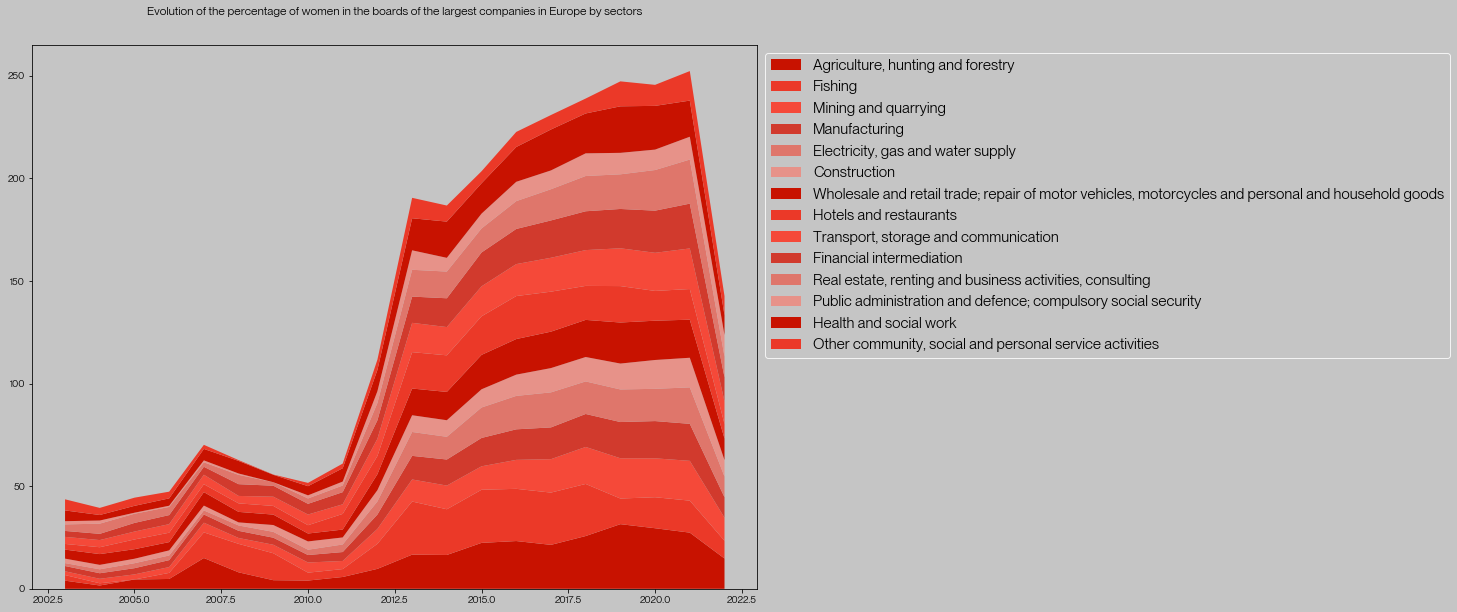

In [147]:
fig, ax = plt.subplots(facecolor=c("grey1"), figsize=(13, 10))
ax.set_facecolor(c("grey1"))
colors = ['#c81200', '#eb3928', c('red'), '#d13a2d', '#df766b', '#e79289']
sns.set_palette(sns.color_palette(colors))
plt.stackplot(detailDataGroup['Year'].unique(), getPiePlotData('A'), getPiePlotData('B'), getPiePlotData('C'),
              getPiePlotData('D'), getPiePlotData('E'), getPiePlotData('F'), getPiePlotData('G'),
              getPiePlotData('H'), getPiePlotData('I'), getPiePlotData('J'), getPiePlotData('K'),
              getPiePlotData('L'), getPiePlotData('N'), getPiePlotData('O'));
plt.legend(loc = 2, bbox_to_anchor = (1,1), prop={'size': 15}, facecolor=c('grey1'), edgecolor='white', 
           labels=['Agriculture, hunting and forestry', 'Fishing', 'Mining and quarrying', 'Manufacturing', 
                   'Electricity, gas and water supply', 'Construction', 
                   'Wholesale and retail trade; repair of motor vehicles, motorcycles and personal and household goods', 
                   'Hotels and restaurants', 'Transport, storage and communication', 'Financial intermediation', 
                   'Real estate, renting and business activities, consulting', 
                   'Public administration and defence; compulsory social security',
                   'Health and social work', 'Other community, social and personal service activities']);
plt.grid(visible=False)
plt.title("Evolution of the percentage of women in the boards of the largest companies in Europe by sectors", pad=30)